# Comportament oscilant și haos

Cînd studiem fenomenele naturale adesea nu ne putem mulțumi cu comportamnetul la echilibru. Adesea modelele nici nu au echilibre sau acestea nu sînt relevante pentru problema studiată. Am văzut deja mai multe situații de comportament oscilant: hormonii oscilează, la fel populațiile ecologice, modelele economice implică oscilații etc.

În științe s-a crezut multă vreme că doar comportamentul la echilibru este posibil, cele oscilante au fost accepatate cu mare dificultate.

Unul dintre domeniile unde a fost respinsă comportarea oscilantă a fost chimia, dar în 1958 B.P. Belousov studiind reducerea bromurilor cu acid malonic. El a observat că lichidul incolor inițial se colora în galben, apoi se decolora și ciclul se repeta.
A fost foarte greu ca acest rezultat să fie acceptat, deoarece părea să violeze principiul al doilea al termodinamicii, dar în timp au fost descoperite multe alte reacții care au un comportament oscilant.

În fiziologie există multe fenomene oscilante:
  - Temperatura corporală a tuturor mamiferelor oscilează cu pîna la $1^\circ C$ în 24 de ore;
  - Secreția de hormoni la toate mamiferelor prezintă oscilații pe durata unei zile;
  - Genele se exprimă adesea ciclic cu cicli de la cîtreva ore la cîteva zile.

Comportarea oscilatorie poate fi gîndită ca un echilibru dinamic. Pentru a studia riguros acest lucru avem nevoie de a face deosebirea între comportamentul transient (pe termen scurt) și cel asimptotic (pe termen lung). 

Pentru un sistem dinamic definim un atractor ca o submulțime $A$ a spațiului fazelor cu proprietatea că are o vecinătate ale cărei puncte sînt atrase de $A$. Riguros avem următoarea definiție:

   **Definiție.** Se numește atractor o submulțime $A$ a spațiului fazelor astfel încît pentru vecinătate de condiții inițiale $X_0$, traiectoriile care pleacă din $X_0$ se apropie de $A$, adică $d(x(t), A) \to 0$ cînd $t \to \infty,$ pentru orice $x(0) \in X_0$.
  
 Am văzut deja exemple de atractori, anume echilibrele stabile. Spre exemplu ecuația logistică cu aglomerare 
$$
x'=bx-\frac{b}{k}x^2.
$$
are un echilibru stabil $x=k$. Orice valoare inițială care pornește din apropierea sa este dusă spre $x=k$, dar nu o atinge într-un timp finit. Spunem că punctul se apropie **asimptotic** de echilibru. La fel pentru arcul cu frecare, echilibrul $(0,0)$ 
atrage asimptotic toate valorile inițiale din apropierea sa.

Deci cel mai simplu atractor este echilibrul stabil, numit și atractor punctual.

Am văzut deja cîteva sisteme, precum cel pentru arcul fără frecare sau cel pentru interacțiunea rîși-iepuri care prezintă oscilații. Din păcate aceste oscilații nu sînt robuste și mici perturbări ale sistemului duc la dispariția oscilațiilor. Ca să înțelegem acest lucru avem nevoie de cîteva definiții. 

   **Definiție**. Dacă $x$ este o variabilă de stare, atunci $x$ este o oscilație dacă este periodică, adică există un $P$ cu proprietatea că $x(t+P)=x(t)$ pentru orice $t$;
    În spațiul stărilor o orbită este periodică dacă este o curbă închisă.

Un atractor care este și o orbită periodică se numește **ciclu limită stabil** sau **atractor ciclu limită**.

## Exemplu: clarinetul lui Rayleigh

Lord Rayleigh a studiat fizica instrumentelor muzicale. Muștiucul clarinetului a fost modelat ca o lamă elastică prinsă de un perete solid. Dacă clarinetistul nu suflă ne aflăm în situația arcului cu frecare și va produce o traiectorie spirală. Cînd suflă însă lucrurile se schimbă, deoarece suflatul acționează ca o frecare inversă ceea ce va duce la o spirală care pleacă din origine. Evident că nu este posibil ca spirala să se îndepărteze la infinit. În realitate dacă viteza lamei  este mică suflatul produce într-adevăr accelerația ei, dar dacă viteza este mare, suflatul o frînează, acționează ca frecarea normală. Pentru a modela aceasta Rayleigh a avut nevoie de o funcție care are panta pozitivă pentru valori mici ale argumentului și panta negativă pentru valori mari. O astfel de funcție este $f(x)=x^3-x$:

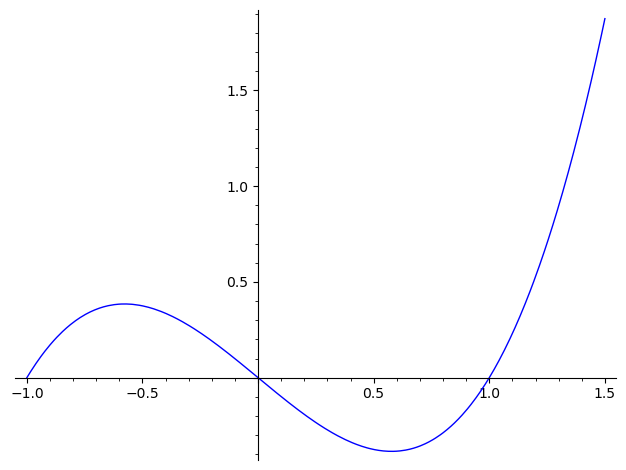

In [6]:
v=var('v')
f(v)=v^3-v
plot(f,(v,-1,1.5))

Sistemul arcului cu frecare este:
$$
\begin{eqnarray}
x' & = & v \\
v' & = & -x-v.
\end{eqnarray}
$$
Noul sistem cu suflat este
$$
\begin{eqnarray}
x' & = & v \\
v' & = & -x-(v^3-v).
\end{eqnarray}
$$

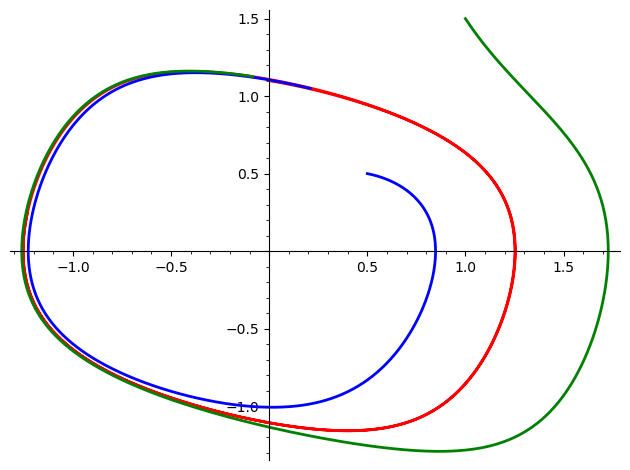

In [17]:
x,y,t=var('x,y,t')
r(x,y)=sqrt((x+y)^2+y^2)
F=[y/r,(-x-y)/r]
F0=[y,-x-(y^3-y)]
#p1 = plot_vector_field(F,(x,-0.5,0.5),(y,-0.5,0.5),title='x\'=y,y\'=-x-y')
endp=6
sol00 = desolve_system_rk4(F0,[x,y],ics=[0,0.5,0.5],ivar=t,end_points=endp,step=0.01)
sol00_plan=[[j,k] for i,j,k in sol00]
sol01 = desolve_system_rk4(F0,[x,y],ics=[0,0,1.1],ivar=t,end_points=2*endp,step=0.01)
sol01_plan=[[j,k] for i,j,k in sol01]
sol02 = desolve_system_rk4(F0,[x,y],ics=[0,1,1.5],ivar=t,end_points=endp,step=0.01)
sol02_plan=[[j,k] for i,j,k in sol02]
p2=line(sol00_plan,thickness=2)
p1=line(sol01_plan,thickness=2,color='red')
p3=line(sol02_plan,thickness=2,color='green')
(p1+p2+p3).show()

Se observă apariția unui ciclu limită (curba roșie) către care sînt atrase toate traiectoriile din vecinătate. Este foarte important ca orbita periodică pe care o obținem să fie stabilă. În muzică aceasta revine la faptul că atunci cînd clarinetistul suflă mai tare, nota nu se schimbă ci doar se aude mai tare. A sufla mai tare revine la a modifică termenul de frecare astfel încît frecarea negativă este mai amplă. De exmplu pute lua 
$$
\begin{eqnarray}
x' & = & v \\
v' & = & -x-(0,5v^3-v).
\end{eqnarray}
$$

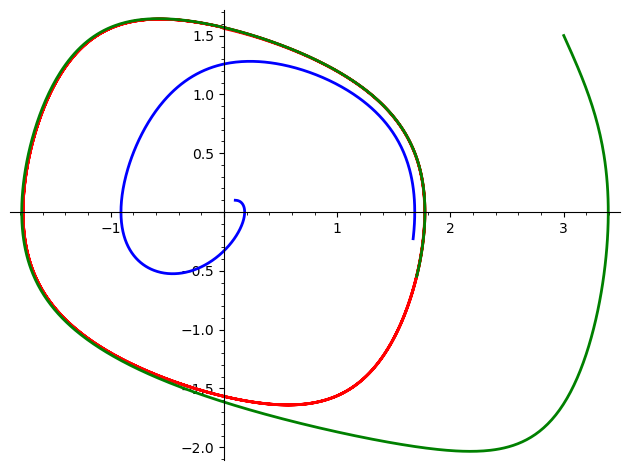

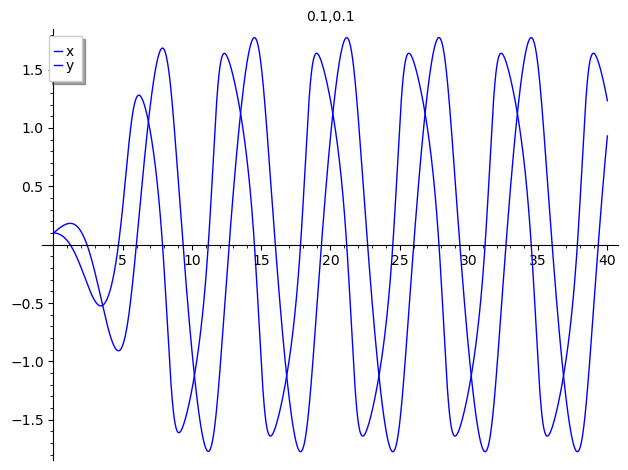

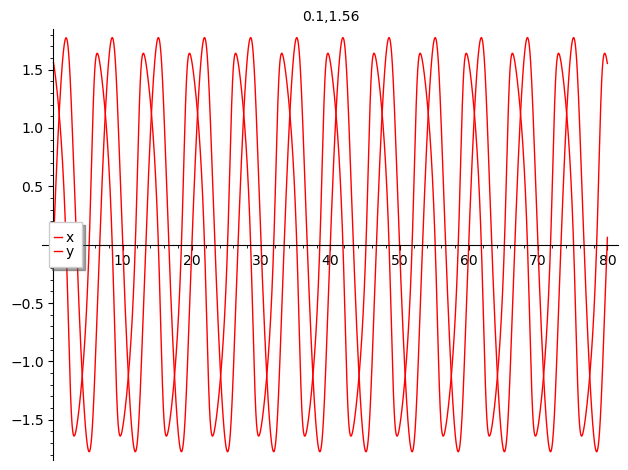

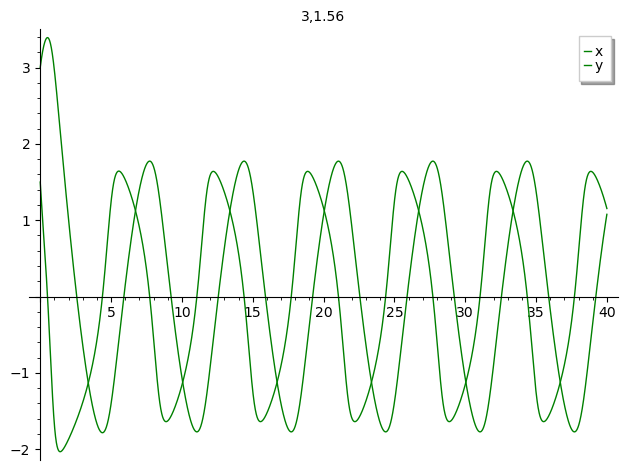

In [19]:
x,y,t=var('x,y,t')
r(x,y)=sqrt((x+y)^2+y^2)
F=[y/r,(-x-y)/r]
F0=[y,-x-(0.5*y^3-y)]
#p1 = plot_vector_field(F,(x,-0.5,0.5),(y,-0.5,0.5),title='x\'=y,y\'=-x-y')
endp=40
sol00 = desolve_system_rk4(F0,[x,y],ics=[0,0.1,0.1],ivar=t,end_points=endp,step=0.01)
sol00_plan=[[j,k] for i,j,k in sol00 if i<=8]
sol01 = desolve_system_rk4(F0,[x,y],ics=[0,0,1.56],ivar=t,end_points=2*endp,step=0.01)
sol01_plan=[[j,k] for i,j,k in sol01 if i<=20]
sol02 = desolve_system_rk4(F0,[x,y],ics=[0,3,1.5],ivar=t,end_points=endp,step=0.01)
sol02_plan=[[j,k] for i,j,k in sol02 if i<=8]
p2=line(sol00_plan,thickness=2)
p1=line(sol01_plan,thickness=2,color='red')
p3=line(sol02_plan,thickness=2,color='green')
(p1+p2+p3).show()
sol00x = [[i,j] for i,j,k in sol00]
sol00y = [[i,k] for i,j,k in sol00]
sol01x = [[i,j] for i,j,k in sol01]
sol01y = [[i,k] for i,j,k in sol01]
sol02x = [[i,j] for i,j,k in sol02]
sol02y = [[i,k] for i,j,k in sol02]
q0x=line(sol00x,legend_label='x')
q0y=line(sol00y,legend_label='y')
(q0x+q0y).show(title='0.1,0.1')
q1x=line(sol01x,legend_label='x',color='red')
q1y=line(sol01y,legend_label='y',color='red')
(q1x+q1y).show(title='0.1,1.56')
q2x=line(sol02x,legend_label='x',color='green')
q2y=line(sol02y,legend_label='y',color='green')
(q2x+q2y).show(title='3,1.56')

### Ecuații cu întîrziere

O ecuație importantă în biologie este modelul Mackey-Glass a controlului respirator a $CO_2$. Notăm cu $x$ concentrația de $CO_2$ în sînge. Controlul este realizat prin creșterea ritmului respirator cînd concentrația este mare și astfel se elimină mai mult $CO_2$. În cuvinte avem x'= metabolismul corporal - ventilație. Presupunem că rata de producție a $CO_2$ este constantă=L. Rata de eliminare este produsul dintre numărul de respirații pe minut și cantitatea de $CO_2$ eliminată la fiecare respirație. Notăm cu $V$ numărul de respirații pe minut care este determinat de concentrația de $CO_2$ din sînge, cînd concentrația este mică, atunci $V$ este mică, iar cînd concentrația este mare  $V$ se apropie de maximum. Fiziologul A.V. Hill care a fost primul care a studiat problema a folosit o clasă de funcții de tip sigmoid, numite funcții Hill:
$$
f(x)=\frac{x^n}{1+x^n}.
$$

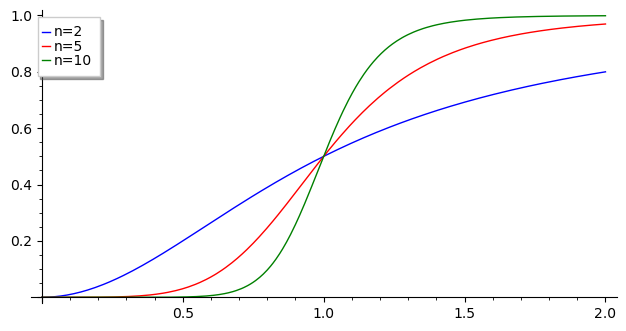

In [29]:
x=var('x')
f(n,x)=x^n/(1+x^n)
n=2
p2=plot(lambda x:f(n,x),(x,0,2),legend_label='n=2')
n=5
p5=plot(lambda x:f(n,x),(x,0,2),legend_label='n=5',color='red')
n=10
p10=plot(lambda x:f(n,x),(x,0,2),legend_label='n=10',color='green')
(p2+p5+p10).show(aspect_ratio=1)

Ecuația care se obține va fi
$$
x'=L-V\cdot x=L-V_{max}\frac{x^n}{1+x^n}\cdot X.
$$
Apare problema că $x-$ul care apare în funcția Hill nu este același care se înmulțește, ci este o valoare din trecut, deoarece există un interval de timp între înregistrarea concentrației din sînge, activarea neuronilor din creier și recepționarea semnalului de către plămîni. La om, aceste interval este de aproximativ 0,2 minute. Deci forma corectă a ecuației Mackey-Glass este
$$
x'=L-V\cdot x=L-V_{max}\frac{x_\tau^n}{1+x_\tau^n},
$$
unde $x_\tau=x(t-\tau)$. Funcția 
$$
V=\frac{V_{max}\cdot x_{\tau}^n}{1+x^n_\tau}
$$
măsoară rata respirației. Cînd $x$ se află în echilibru, la fel se întîmplă și cu $V$.

Pentru diferite valori ale parametrilor rata respirației variază astfel:

![](p1.png)

![](p2.png)

![](p3.png)

Este interesant că pentru ecuații cu întîrziere pot apărea soluții periodice chiar dacă au o singură variabilă, ceea ce nu se întimplă pentru ecuații diferențiale ordinare.

# Haos în sisteme discrete și continue

Modelele cu două specii sînt în general puțin realiste, deoarece ecosistemele reale au mai multe specii. Vom vedea un model cu trei specii și vom studia ce comportament poate să apară. Cele trei specii vor fi plante, iepuri și vulpi. $x$ va fi masa de plante, $y$ numărul de iepuri și $z$ numărul de vulpi. Presupunem că în absența ierbivorelor, plantele se vor dezvolta după ecuația logistică. De asemenea presupunem că consumul ierbivorele se saturează o dată cu creșterea densității plantelor după funcția
$$
f_1(x)=\frac{a_1x}{1+b_1x}.
$$
Deci ecuația pentru plante este
$$
x'=rx\left(1-\frac{X}{K}\right)-\frac{a_1x}{1+b_1x}y;
$$
Pentru cele două clase de animale presupunem că rata nașterilor este proporțională cu cantitatea de hrană și că rata de decese este constantă. La fel rata de consum a iepurilor de către vulpi este de asemenea saturată de cantitatea de pradă. Avem deci
$$
\begin{eqnarray}
y' & = & c_1\frac{a_1 x}{1+b_1x}y-d_1y-\frac{a_2 y}{1+b_2y}z \\
z' & = & c_2\frac{a_2 y}{1+b_2y}z-d_2z.
\end{eqnarray}
$$
Putem presupune că $r,K, c_1,c_2$ sînt egale cu $1$. Sistemul devine
$$
\begin{eqnarray}
x'&=& x\left(1-x \right)-\frac{a_1x}{1+b_1x}y \\
y' & = & \frac{a_1 x}{1+b_1x}y-d_1y-\frac{a_2 y}{1+b_2y}z \\
z' & = & \frac{a_2 y}{1+b_2y}z-d_2z.
\end{eqnarray}
$$

Graphics3d Object

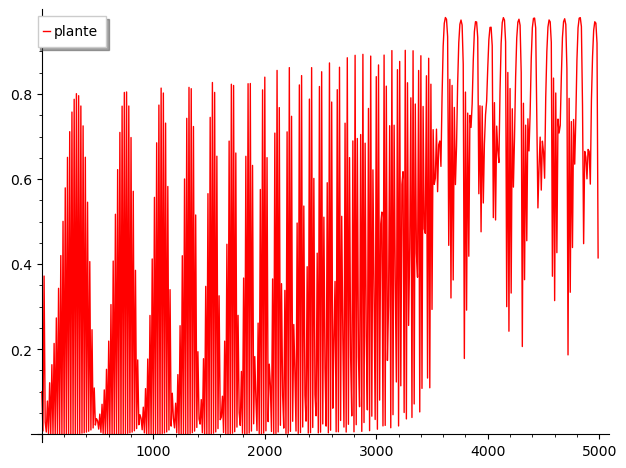

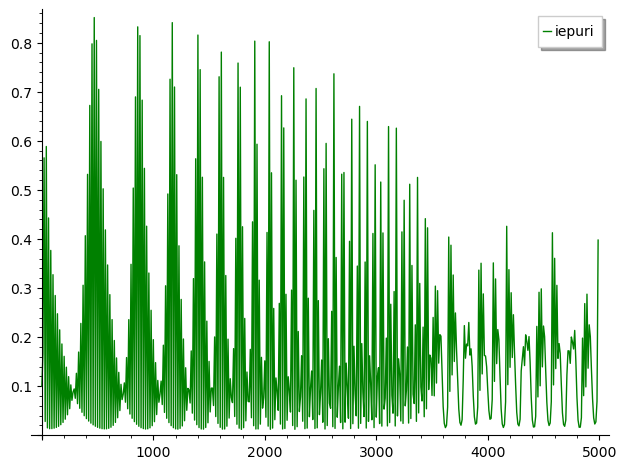

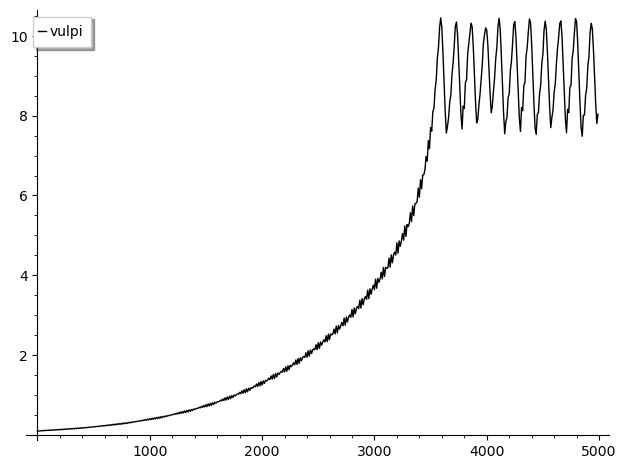

In [5]:
x,y,z,t=var('x,y,z,t')
a1=5;b1=3;a2=0.1;b2=2;d1=0.4;d2=0.01
F=[x*(1-x)-a1*x*y/(1+b1*x),a1*x*y/(1+b1*x)-d1*y-a2*y*z/(1+b2*y),a2*y*z/(1+b2*y)-d2*z]
ics=[0.1,0.1,0.1]
ics0=[0.0,0.1,0.1,0.1]
end_val=5000.0
times=srange(0.0,end_val,0.1)
endp=900
sol00 = desolve_odeint(F,ics,times,[x,y,z],rtol=1e-13,atol=1e-14)
#sol01 = desolve_system_rk4(F,[x,y,z],ics0,ivar=t,end_points=endp,step=0.1)
#sol01_plot=[[x,y,z] for t,x,y,z in sol01]
#line3d(sol01_plot,aspect_ratio=1).show(viewer='threejs')
line3d(sol00,aspect_ratio=[10,10,1]).show(viewer='threejs')
xs=[x for x,y,z in sol00][::100]
ys=[y for x,y,z in sol00][::100]
zs=[z for x,y,z in sol00][::100]
ts=[0+t/10 for t in range(0,10*int(end_val))][::100]
xp=list(zip(ts,xs))
yp=list(zip(ts,ys))
zp=list(zip(ts,zs))
px=line(xp,color='red',legend_label='plante')
py=line(yp,color='green',legend_label='iepuri')
pz=line(zp,color='black',legend_label='vulpi')
px.show()
py.show()
pz.show()

Simulările precedente arată că aparent valorile oscilează, dar valorile fiecărei perioade sînt diferite și comportamentul pare aleator. Ca să înțelegem mai bine haosul vom începe prin a studia sistemele discrete. 

## Sisteme discrete

Pentru sistemele discrete timpul trece în pași discreți. Adică timpul ia valorile $1,2,3,\dots$. Acest tip de modele funcționează de exemplu pentru specii care au sezoane de reproducție. Vom not $x(n)$ cu $x_n$. Atunci ecuația de evoluție va fi de forma
$$
x_{n+1}=0.3\cdot x_n.
$$
Aceasta  este o ecuație cu diferențe. Forma generală din care provine exemplul nostru este 
$$
x_{n+1}=rx_n.
$$
Dacă $r<1$ valorile scad, dacă $r > 1$ valorile cresc. 

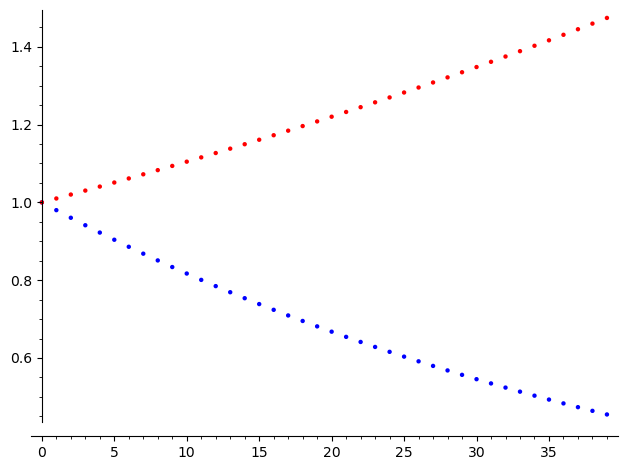

In [21]:
n=var('n')
x0=1
f1(x)=0.98*x
xs=[x0]
for n in range(1,40):
    x=f1(xs[-1])
    xs.append(x)
p1=list_plot(xs)
xs=[x0]
f2(x)=1.01*x
for n in range(1,40):
    x=f2(xs[-1])
    xs.append(x)
p2=list_plot(xs,color='red')
(p1+p2).show()

După cum vedem creșterea exponențială începe relativ încet, apoi din ce în ce mai repede. Ca să vedem cît de repede, calculăm
$$
\Delta_{n+1} x=x_{n+2}-x_{n+1}=r(x_{n+1}-x_n)=r\Delta_n x.
$$
Deci rata de modificare (viteza) crește cu rata $r.$ Cînd populația este mică rata de creștere este mică, dar pe măsură ce populația crește, ea crește din ce în ce mai repede.

Studiem acum modelul logistic discret introdus de May în 1976. Presupunem că avem o populație de insecte care trăiesc un an, depun ouă, apoi mor. Populația la  momentul $n+1$ va fi $x_{n+1}=f(x_n).$ Presupunem că mediul suportă maximum $k$ insecte. Dacă populația este $x_n$ atunci ea va consuma $\frac{x_n}{k}$ resurse, deci resursele neutilizate vor fi $1-\frac{x_n}{k}.$ Aceste resurse neutilizate sînt disponibile pentru a susține noi nașteri, deci rata nașterilor este proporțională cu $1-\frac{x_n}{k}$ cu un factor de proporționalitate $r$. Prin urmare avem
$$
f(x)=r\cdot x\cdot \left(1-\frac{x}{k}\right).
$$
Ca de obicei presupunem $k=1$. Obținem sistemul dinamic
$$
x_{n+1}=rx_n(1-x_n).
$$
Să simulăm acum sistemul pentru $r=4$ și $x_0=0.01.$

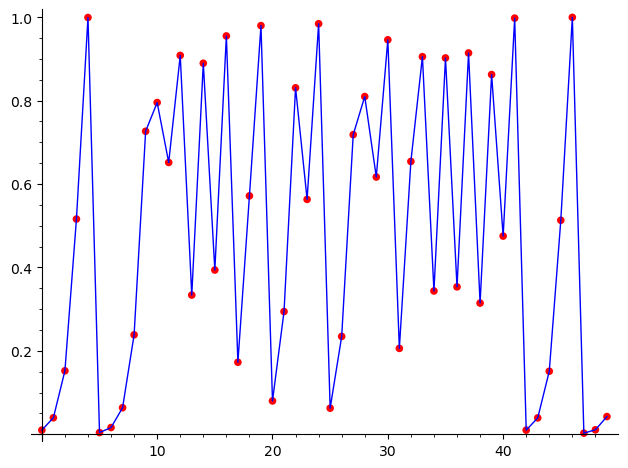

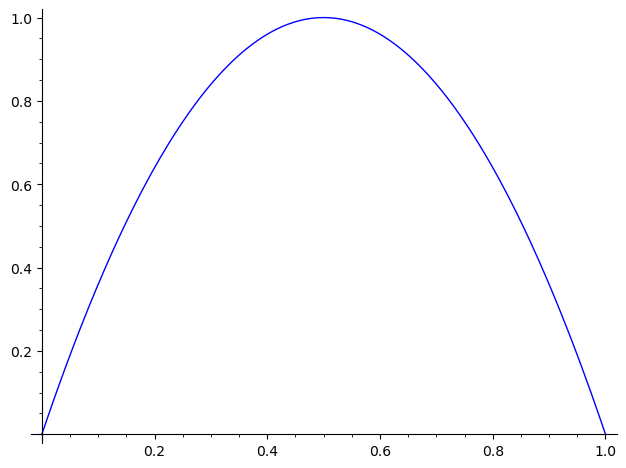

In [2]:
n=var('n')
x0=0.01
f1(x)=4*x*(1-x)
xs=[x0]
for n in range(1,50):
    x=f1(xs[-1])
    xs.append(x)
ts=[t for t in range(len(xs))]
ps=list(zip(ts,xs))
p1=line(ps)
p2=points(ps,size=30,color='red')
(p1+p2).show()
plot(f1,(x,0,1))

In [1]:
def cobweb(a_function, start, mask = 0, iterations = 20, xmin = 0, xmax = 1):
    #See https://wiki.sagemath.org/interact/dynsys
    '''
    Returns a graphics object of a plot of the function and a cobweb trajectory starting from the value start.

    INPUT:
        a_function: a function of one variable
        start: the starting value of the iteration
        mask: (optional) the number of initial iterates to ignore
        iterations: (optional) the number of iterations to draw, following the masked iterations
        xmin: (optional) the lower end of the plotted interval
        xmax: (optional) the upper end of the plotted interval
    
    EXAMPLES:
        sage: f = lambda x: 3.9*x*(1-x)
        sage: show(cobweb(f,.01,iterations=200), xmin = 0, xmax = 1, ymin=0)
    
    '''
    basic_plot = plot(a_function, xmin = xmin, xmax = xmax)
    id_plot = plot(lambda x: x, xmin = xmin, xmax = xmax)
    iter_list = []
    current = start
    for i in range(mask):
        current = a_function(current)
    iter_list.append([current,current])
    for i in range(iterations):
        iter_list.append([current,a_function(current)])
        current = a_function(current)
        iter_list.append([current,current])
    cobweb = line(iter_list, rgbcolor = (1,0,0))
    return basic_plot + id_plot + cobweb

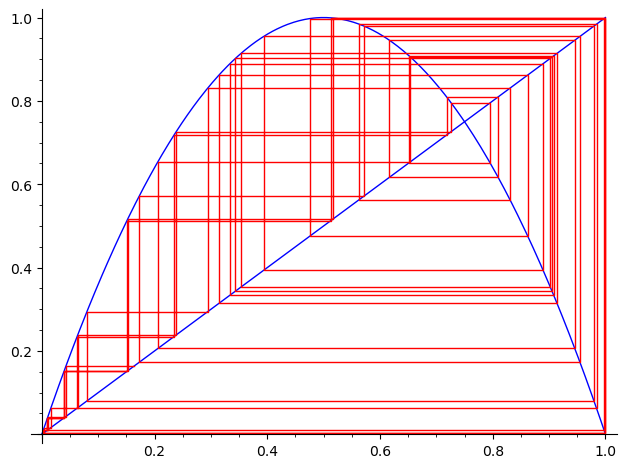

In [41]:
show(cobweb(f1,0.01,iterations=50))

Comportarea sistemului logistic discret este un exemplu de comportare haotică: spunem că un sistem are un comportament haotic dacă
  1. Sistemul este determinist, adică valoarea la un anumit model depinde doar de valorile anterioare;
  2. Toate valorile sistemului rămîn între anumite limite (mărginire)ș
  3. Lipsa de regularitate: orbitele nu sînt periodice și nici nu tind spre o anumită valoare;
  4. Sensibilitate față de alegerea valorilor inițiale.

Modelul logistic discret satisface toate aceste proprietăți. Valorile sale rămîn mai mici decît $1$, iar dependența de valorile inițiale se vede mai jos:

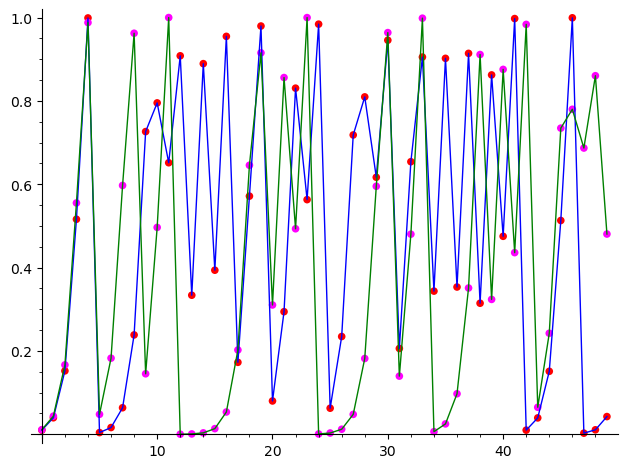

In [45]:
n=var('n')
x0=0.01
f1(x)=4*x*(1-x)
xs=[x0]
for n in range(1,50):
    x=f1(xs[-1])
    xs.append(x)
ts=[t for t in range(len(xs))]
ps=list(zip(ts,xs))
p1=line(ps)
p2=points(ps,size=30,color='red')
#(p1+p2).show()
x1=0.011
xs=[x1]
for n in range(1,50):
    x=f1(xs[-1])
    xs.append(x)
ts=[t for t in range(len(xs))]
ps=list(zip(ts,xs))
p3=line(ps,color='green')
p4=points(ps,size=30,color='magenta')
(p1+p2+p3+p4).show()

Riguros spunem că dacă avem două traiectorii $M_t$ și $N_t$ corespunzătoare valorilor inițiale $M_0$ și $N_0$, atunci sistemul posedă sensibilitatea față de valorile inițiale dacă 
$$
dist(M_t,N_t)=e^{\lambda t}dist(M_0,N_0).
$$
Numărul $\lambda$ se numește exponentul Lyapunov al sistemului.

Sensibilitatea față de condițiile inițiale face imposibil să obținem predicții pentru comportarea sistemelor pe termen lung. O altă problemă este legată de aproximare. Dacă două valori inițiale diferă doar la 16-cea zecimală, după un număr suficient de mare de iterații valorile obținute vor fi total diferite. Avînd în vedere că în practică lucrăm cu aproximări, nu putem obține o predicție a comportării sitemului, deci va trebui să ne mulțumim cu studiul calitativ al problemelor respective.

### Rute spre haos

Haosul este o proprietate a unui sistem dinamic, care de obicei depinde de valorile parametrilor. De exemplu pentru $r=2,5$ sistemul logistic are un echilibru stabil:

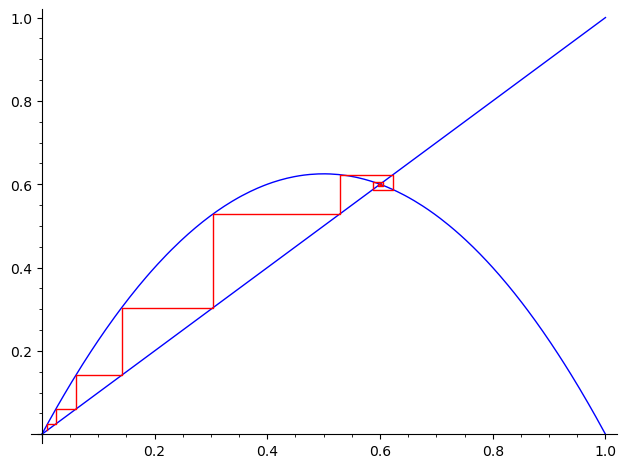

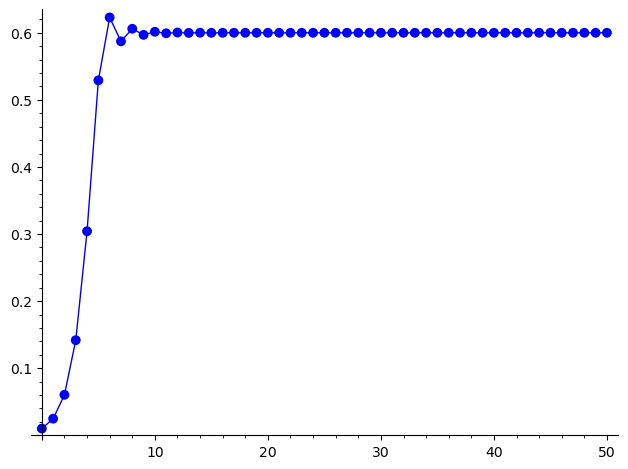

In [8]:
x=var('x')
r=2.5
x0=0.01
f(x)=r*x*(1-x)
show(cobweb(f,x0,iterations=50))
xs=[x0]
for n in range(1,51):
    x=f(xs[-1])
    xs.append(x)
ts=[t for t in range(len(xs))]
xp=list(zip(ts,xs))
p1=points(xp,size=50)
p2=line(xp)
(p1+p2).show()

Dacă studiem cum se schimbă comportamentul sistemului pentru diferite valori ale parametrului $r$ se vede pentru valori mai mari decît $3.0$, echilibrul devine instabil. 

In [5]:
@interact
def logistic(r=slider(0,4,step_size=0.01)):
    x0=0.01
    def f(x):
        return r*x*(1-x)
    xs=[x0]
    for n in range(1,200):
        x=f(xs[-1])
        xs.append(x)
    ts=[t for t in range(len(xs))]
    xp=list(zip(ts,xs))
    p1=points(xp,size=50)
    show(p1)

Interactive function <function logistic at 0x7f77f1fac550> with 1 widget
  r: TransformFloatSlider(value=0.0, description='r', max=4.0, step=0.01)

Echilibrul satisface $x_{n+1}=x_n$, adică $rx_n(1-x_n)=x_n$, împărțim ambii membri cu $x_n$ și obținem $r(1-x_n)=1$, adică 
$$x^*=\frac{r-1}{r}.$$ Studiem acum stabilitatea echilibrului. Din principiul Hartman-Grobman știm că stabilitatea este dată de aproximarea liniară în jurul echilibrului. Mai demult am scris
$$
\Delta y =\left. \frac{df}{dx}\right|_{x^*}\Delta x
$$
la noi $y=x_{n+1}$ și $x=x_n$. Deci aproximarea liniară este 
$$
x_{n+1}-x^* =\left. \frac{df}{dx}\right|_{x^*} (x_n-x^*).
$$
De aici se vede că dacă modulul 
$$
\left|\left. \frac{df}{dx}\right|_{x^*}\right|<1,
$$
atunci $x_n$ se apropie de echilibru pe măsură ce $n$ crește, deci echilibrul este stabil, iar dacă modulul este mai mare decît $1$, $x_n$ se îndepărtează de echilibru, deci acesta este instabil. 

La noi $f(x)=rx(1-x)$, deci $\frac{df}{dx}=r-2rx$. Calculăm 
$$
\left. \frac{df}{dx}\right|_{x^*}=r-2r\frac{r-1}{r}=2-r.
$$
Deci $x^*$ este instabil dacă $|2-r|>1$. Pentru $r\geq 2$, atunci $x^*$ este instabil pentru $r > 3$. 

Din interacțiunea de mai sus am văzut că pentru $r=3.01$ apare un atractor periodic de perioadă 2, apoi după $3,45$ apare un atractor periodic de perioadă 4, după $3,56$ atractorul are perioada $8$, etc.

După $3,6$ comportamentul devine haotic. Aceast fenomen se numește bifurcația de dublare a perioadei și este una dintre căile spre haos.
